In [1]:
import numpy as np
import time
import cv2
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = 8, 6

In [3]:
features = []
for i in range(4):
    path = f'./data/features_{i}.npy'
    features.append(np.load(path))

In [4]:
y_train = np.load('./data/y_train.npy')
y_test = np.load('./data/y_test.npy')

x = np.vstack(features)
y = np.concatenate((y_train, y_test))

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print('Train shape: ', x_train.shape, y_train.shape)
print('Test shape: ', x_test.shape, y_test.shape)

Train shape:  (4672, 15876) (4672,)
Test shape:  (1168, 15876) (1168,)


In [6]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [7]:
start = time.time()

svc = SVC(kernel='linear', probability=True) 
svc.fit(x_train, y_train)
y_train_pred = svc.predict(x_train)
y_test_pred = svc.predict(x_test)

print('Train accuracy: ', accuracy_score(y_train, y_train_pred))
print('Validation accuracy: ', accuracy_score(y_test, y_test_pred))
print(f'Training time {time.time() - start}')

Train accuracy:  1.0
Validation accuracy:  0.934931506849315
Training time 615.7984461784363


Confusion matrix, without normalization
[[291  35]
 [ 41 801]]


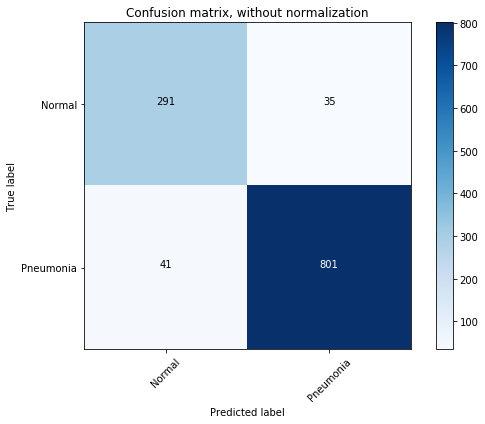

In [8]:
cnf_matrix = confusion_matrix(y_test, y_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Normal', 'Pneumonia'],
                      title='Confusion matrix, without normalization')

Normalized confusion matrix
[[0.89 0.11]
 [0.05 0.95]]


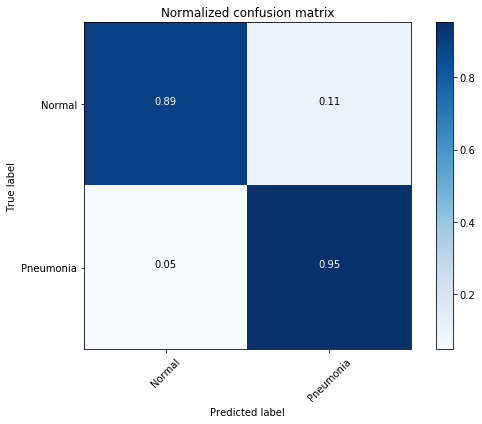

In [9]:
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Normal', 'Pneumonia'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [10]:
tn, fp, fn, tp = cnf_matrix.ravel()

precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1_score = 2*((precision*recall)/(precision+recall))

print("Accuracy of the model is {:.2f}".format(accuracy_score(y_test, y_test_pred)))
print("Recall of the model is {:.2f}".format(recall))
print("Precision of the model is {:.2f}".format(precision))
print("F1 Score of the model is {:.2f}".format(f1_score))

Accuracy of the model is 0.93
Recall of the model is 0.95
Precision of the model is 0.96
F1 Score of the model is 0.95


In [11]:
from xgboost import XGBClassifier

start = time.time()

model = XGBClassifier(objective='binary:logistic', seed=42) 
model.fit(x_train, y_train)

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

print('Train accuracy: ', accuracy_score(y_train, y_train_pred))
print('Validation accuracy: ', accuracy_score(y_test, y_test_pred))
print(f'Training time {time.time() - start}')

Train accuracy:  0.9895119863013698
Validation accuracy:  0.9409246575342466
Training time 400.66602516174316


Confusion matrix, without normalization
[[282  44]
 [ 25 817]]


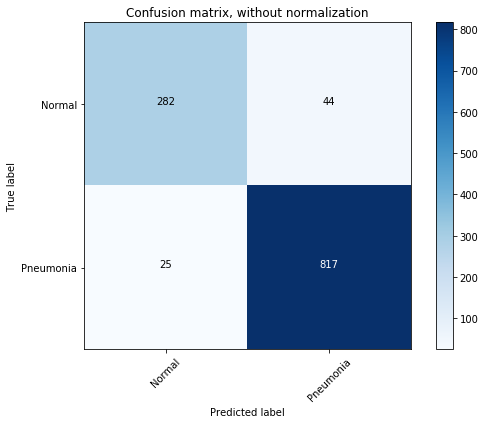

In [12]:
cnf_matrix = confusion_matrix(y_test, y_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Normal', 'Pneumonia'],
                      title='Confusion matrix, without normalization')

Normalized confusion matrix
[[0.87 0.13]
 [0.03 0.97]]


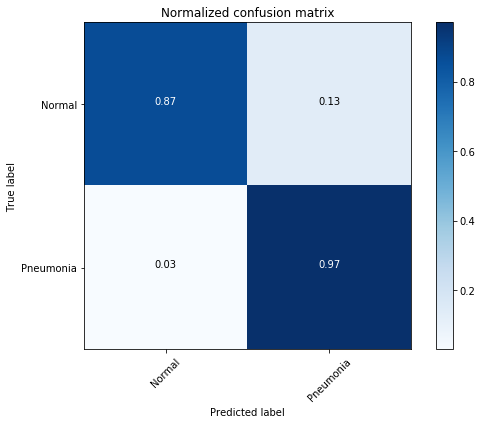

In [13]:
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Normal', 'Pneumonia'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [14]:
tn, fp, fn, tp = cnf_matrix.ravel()

precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1_score = 2*((precision*recall)/(precision+recall))

print("Accuracy of the model is {:.2f}".format(accuracy_score(y_test, y_test_pred)))
print("Recall of the model is {:.2f}".format(recall))
print("Precision of the model is {:.2f}".format(precision))
print("F1 Score of the model is {:.2f}".format(f1_score))

Accuracy of the model is 0.94
Recall of the model is 0.97
Precision of the model is 0.95
F1 Score of the model is 0.96
